In [6]:
using Printf, Roots

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [7]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Yield to Maturity

The yield to maturity (ytm) is the $\theta$ that solves

$P = \sum_{k=1}^{K} \frac{cf_{k}}{(1+\theta)  ^{m_{k}}}$,

where $cf_k$ is the cash flow from the bond (portfolio) $k$ periods ahead and $P$ is the current price of the bond (portfolio).

We typically have to find $\theta$ by a numerical method.

# Task 1

Starting by coding a function that calculates a price of the bond as a function of the cash flows ($cf$, a vector), times to the cash flows ($k$, also a vector) and the discount rate ($\theta$, a single number).

Assume that the bond portfolio pays 0.2 each year for 10 years (1 year from now, 2 years from now,...). (It pays no face value. This is an annuity.) 

(1) What is a fair price if the discount rate $\theta$ is 0.05?
(2) Plot the fair price as a function of $\theta$ (use θ = -0.02:0.005:0.1)

(1) Price at θ=0.05:      1.544


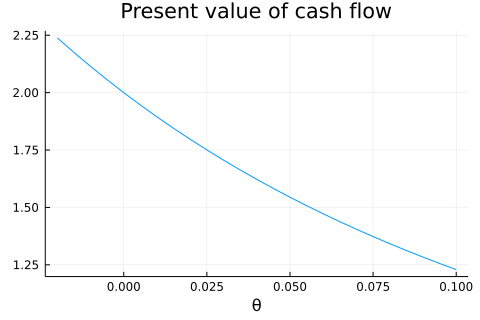

In [18]:
# calculate the formula above
function PV(θ, cf, k) #cf is a vector of all cash flows at times k[1],k[2],...
    cdisc = cf./((1.0.+θ).^k)          
    P     = sum(cdisc)                 
    return P
end

θ = -0.02:0.005:0.1
k = 1:10
cf = 0.2*ones(10)

printlnPs("(1) Price at θ=0.05: ",PV(0.05,cf,k))

n = length(θ)
Pfair = fill(NaN, n)
for i = 1:n
    Pfair[i] = PV(θ[i], cf, k)
end

# Pfair = PV.(θ, Ref(cf), Ref(k))

plot(θ, Pfair, title="Present value of cash flow", legend=false, xlabel="θ")


# Task 2

Assume the price this bond (portfolio) is 1.54. Solve for the ytm. Compare with the previous figure. Repeat with a bond price of 1.71.

Hint: the `find_zero()`command of the `Roots.jl` package.

In [21]:
P1 = 1.54
P2 = 1.71

ytm1 = find_zero(θ->PV(θ,cf,k)-P1,(-0.1,0.1)) 
ytm2 = find_zero(θ->PV(θ,cf,k)-P2,(-0.1,0.1)) 

printlnPs("The price and yield to maturity is ")
printmat([P1,P2],[ytm1,ytm2],colNames=["P","θ"])


The price and yield to maturity is 
         P         θ
     1.540     0.051
     1.710     0.030



# Task 3a

Now interpret `cf` as the cash flow to a company where `cf[1]` also incorporates the initial investment and `m[1]=0`. (Alternatively, let `P` represent the initial investment.)

The cash flow process is as follows. Find the IRR (internal rate of return).

Hint: `findzero(fn,0)` would start searching at 0.

In [23]:
cf = [-150,100,0,130]
m  = [0,1,2,3]

iir = find_zero(θ->PV(θ, cf, m), 0)

0.2349421128831387

# Task 3b

Change the cash flow as in the cell below. Find the IRR. Could there be several solutions?

(Hint: `find_zeros()`)

In [32]:
cf = [-140,320,0,-190]

iir = find_zeros(θ->PV(θ, cf, m),-1,1)

2-element Vector{Float64}:
 0.04650143593633046
 0.9160439083362444